In [17]:
import numpy as np
from sklearn.linear_model import SGDClassifier
import datasets.read as data
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

In [18]:
X, y = data.read_Rice_Cammeo_Osmancik("datasets/")

/home/klimek/sem8_v2/aml/aml_projects/Project1/datasets/read.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Class'] = df['Class'].replace('Osmancik', 0)


In [19]:
X.shape

(3810, 7)

In [20]:
np.isnan(X).sum()

0

In [21]:
X[:5,:]

array([[1.52310000e+04, 5.25578979e+02, 2.29749878e+02, 8.50937881e+01,
        9.28882003e-01, 1.56170000e+04, 5.72895527e-01],
       [1.46560000e+04, 4.94311005e+02, 2.06020065e+02, 9.17309723e+01,
        8.95404994e-01, 1.50720000e+04, 6.15436316e-01],
       [1.46340000e+04, 5.01122009e+02, 2.14106781e+02, 8.77682877e+01,
        9.12118077e-01, 1.49540000e+04, 6.93258822e-01],
       [1.31760000e+04, 4.58342987e+02, 1.93337387e+02, 8.74483948e+01,
        8.91860902e-01, 1.33680000e+04, 6.40669048e-01],
       [1.46880000e+04, 5.07166992e+02, 2.11743378e+02, 8.93124542e+01,
        9.06690896e-01, 1.52620000e+04, 6.46023929e-01]])

In [22]:
y.shape

(3810,)

In [23]:
np.isnan(y).sum()

0

In [24]:
y[:5]

array([1, 1, 1, 1, 1])

## IRLS test

In [25]:
m = SGDClassifier(loss="log_loss", max_iter=500, random_state=0, penalty=None, learning_rate='constant', eta0=1e-6, fit_intercept=True)
m.fit(X, y)
cfs = np.concatenate((m.intercept_, m.coef_.flatten()))
cfs

array([-0.00561871, -0.20782421, -0.95397872, -0.24150052, -0.38168585,
       -0.00424   ,  0.24261114, -0.00426741])

<Axes: title={'center': 'Class = 1'}, ylabel='Count'>

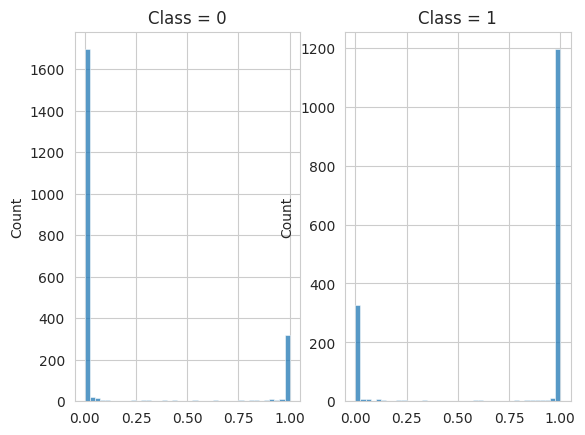

In [26]:
y0 = y==0
y1 = y==1

p0 = m.predict_proba(X[y0])[:,1].flatten()
p1 = m.predict_proba(X[y1])[:,1].flatten()

fig, ax = plt.subplots(1, 2)
ax[0].set_title('Class = 0')
sns.histplot(x=p0, ax=ax[0], binwidth=0.025)
ax[1].set_title('Class = 1')
sns.histplot(x=p1, ax=ax[1], binwidth=0.025)

In [27]:
y_pred = m.predict(X)
1 - np.abs(y_pred - y).mean()

0.7979002624671916

0.7239263803680982

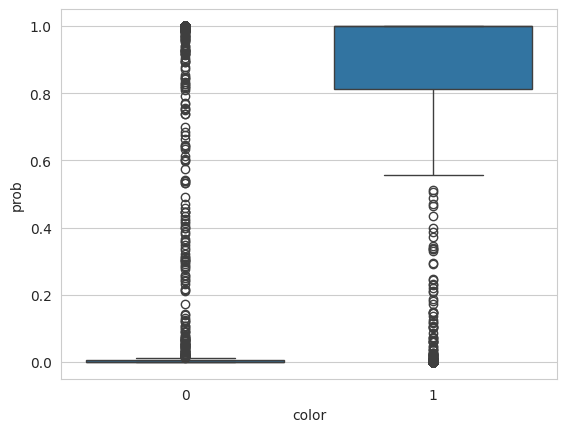

In [30]:
yyy = m.predict_proba(X)[:,1]
df = pd.DataFrame.from_dict({'prob': yyy, 'color': y})
sns.boxplot(data=df, x='color', y='prob')

(yyy[y1] > 0.99).mean()

In [ ]:
np.all(m.get_params()['weights'] == np.diag(np.ones(X.shape[0])))

In [ ]:
m.get_params()